<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/goldenrod).*


<!--NAVIGATION-->
< [Fetch all the KEGS data with `wget`](01.03-wget-all-KEGS-data.ipynb) | [Contents](Index.ipynb) | [KEGS galaxies reduced with EVEREST](01.05-Match_Everest_meta_data.ipynb) >

# Spot check some Target Pixel Files

Now that we have some TPF's from KEGs, let's just spot-check them and see what we see.  It also might be interesting to look at the Everest lightcurve for these to see how well Everest performs on Galaxies.  

At the present time, pre-computed Everest lightcurves are only available for Campaigns 0-8.  Let's focus on campaign 5, which is `GO5096`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import os

In [2]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [3]:
k2_path = '/Volumes/Truro/k2/KEGS/'

In [4]:
all_files = os.listdir(k2_path)
len(all_files)

27488

In [5]:
all_files[0:5]

['GO0103_c0_tpf_wget.txt',
 'GO10053_c10_tpf_wget.txt',
 'GO10070_c10_tpf_wget.txt',
 'GO1074_c1_tpf_wget.txt',
 'GO3048_c3_tpf_wget.txt']

Let's just focus on data from campaign 5.

In [6]:
c_files = [file for file in all_files if '-c05_' in file]

In [7]:
len(c_files)

2802

There are about 2802 target pixel files in campaign 2802.

In [8]:
c_files[0:3]

['ktwo211300349-c05_lpd-targ.fits.gz',
 'ktwo211303780-c05_lpd-targ.fits.gz',
 'ktwo211303922-c05_lpd-targ.fits.gz']

Let's just pick a random galaxy.

In [9]:
targ = 3

In [10]:
f_name = c_files[targ]
hdu_full = fits.open(k2_path+f_name)
print(f_name)

ktwo211304606-c05_lpd-targ.fits.gz


In [11]:
EPIC_ID = int(f_name[4:4+9])
EPIC_ID

211304606

In [12]:
hdu_full.info()

Filename: /Volumes/Truro/k2/KEGS/ktwo211304606-c05_lpd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  TARGETTABLES    1 BinTableHDU    282   3663R x 13C   [D, E, J, 56J, 56E, 56E, 56E, 56E, 56E, J, E, E, 0E]   
  2  APERTURE      1 ImageHDU        48   (7, 8)   int32   


The data is stored in `extension` 1.

In [13]:
dat2 = hdu_full[1].data

Let's just look at a single snapshot image, cadence number 300.

In [14]:
frame300 = dat2['FLUX'][300, :,:]

<IPython.core.display.Javascript object>


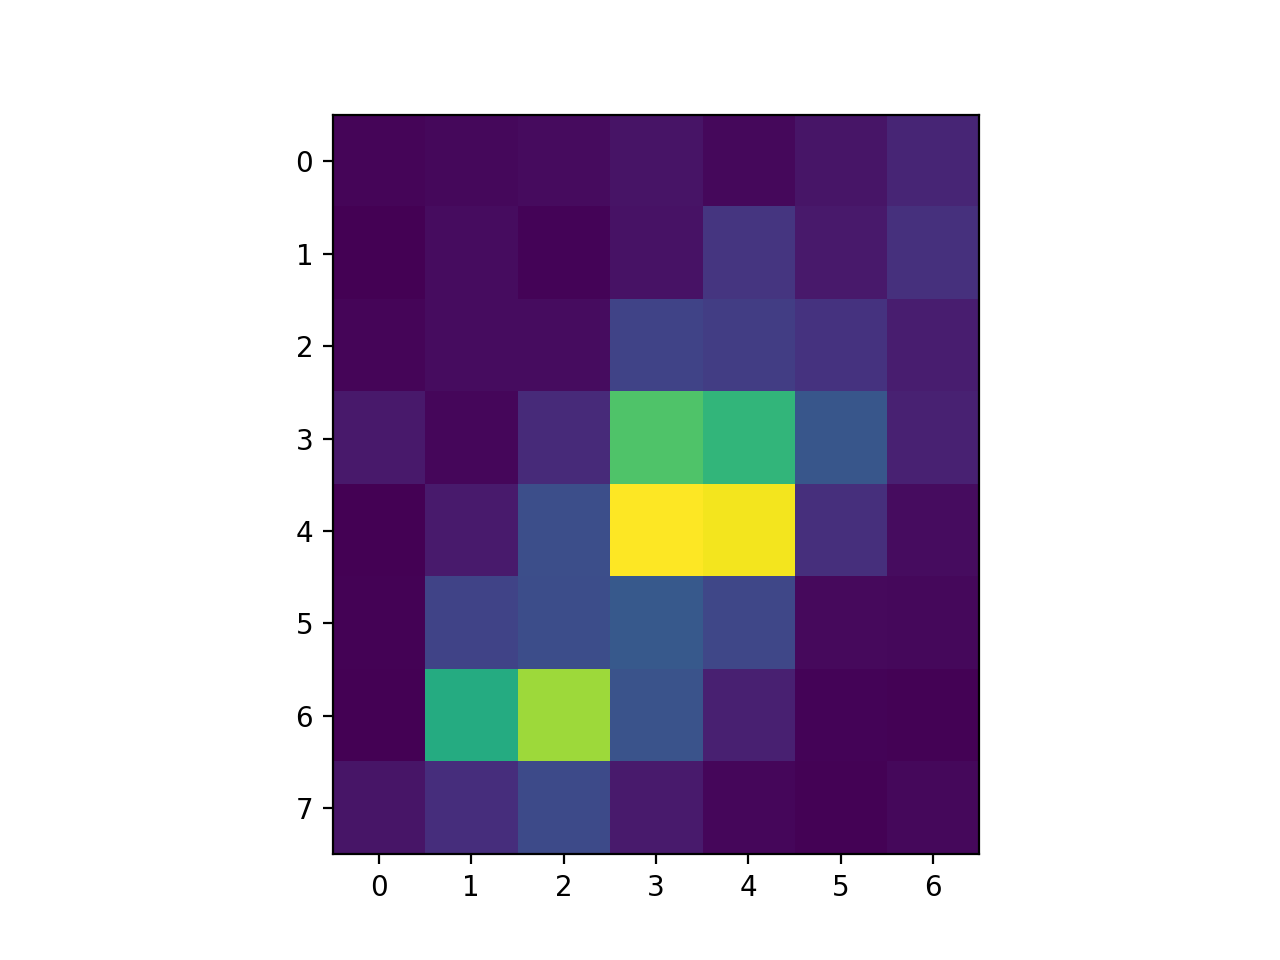

In [16]:
plt.imshow(frame300);

We can get more information about this target from its FITS header.

In [17]:
hdu0 = hdu_full[0]

In [18]:
hdu0.header['OBJECT']

'EPIC 211304606'

In [19]:
hdu0.header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-10-13'         / file creation date.                            
CREATOR = '97164 TargetPixelExporterPipelineModule' / pipeline job and program u
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.31 r60524' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

### EVEREST

The EVEREST detrending pipeline is aimed at finding exoplanetary transit signals.  Many of the design choices made in EVEREST remove astrophysical signals.

In order to run the code below you must have Everest installed.

In [20]:
import everest

In [21]:
star = everest.Everest(EPIC_ID)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 211304606.


What aperture did EVEREST use?

<IPython.core.display.Javascript object>


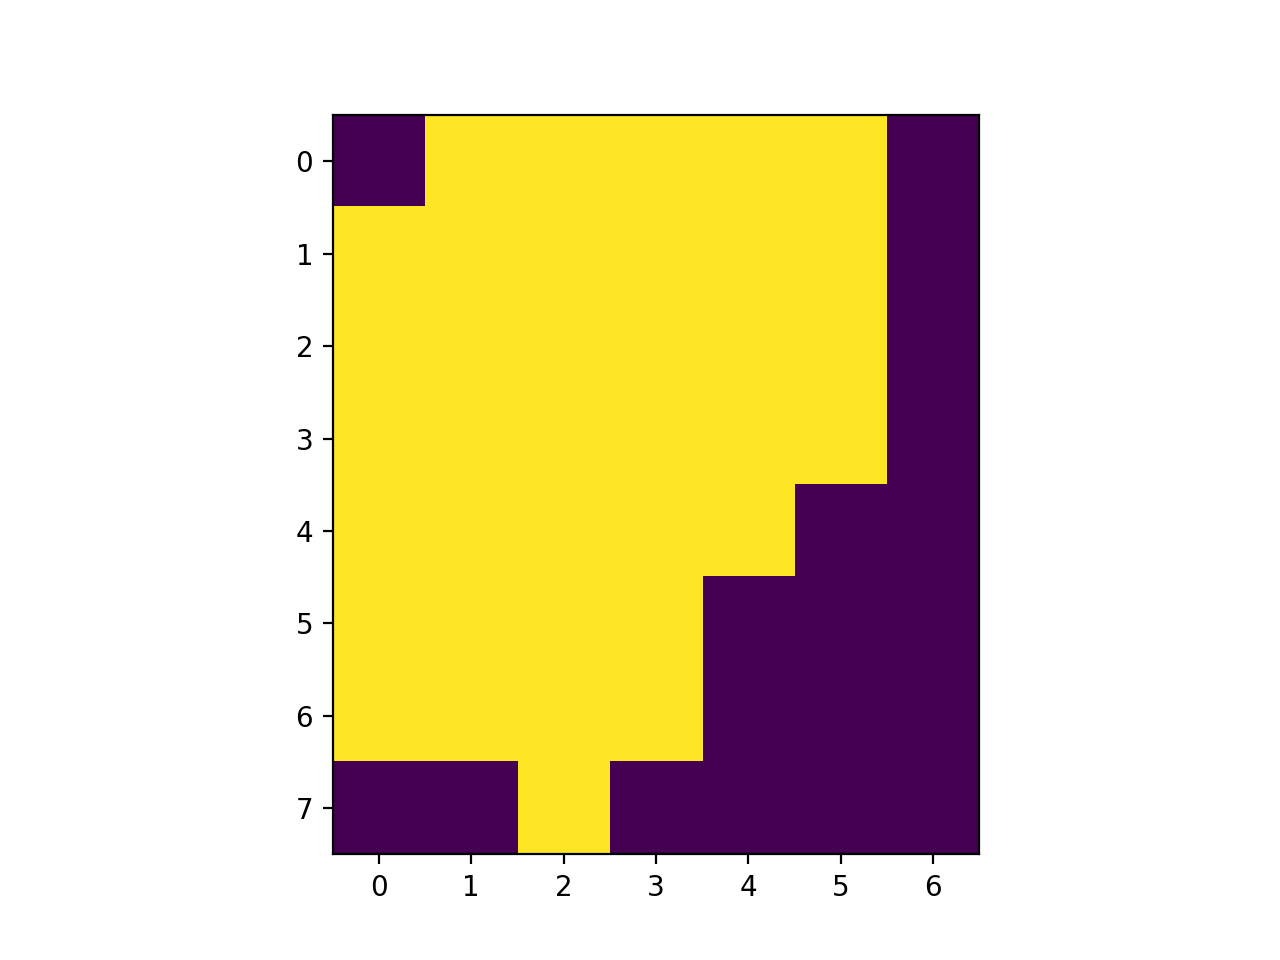

In [22]:
plt.imshow(star.aperture);

We can simply sum up all the pixels that fall in that aperture.

In [23]:
tot_flux = np.nansum(dat2['FLUX']*star.aperture, axis=(1,2))

Compare the different methods.

<IPython.core.display.Javascript object>


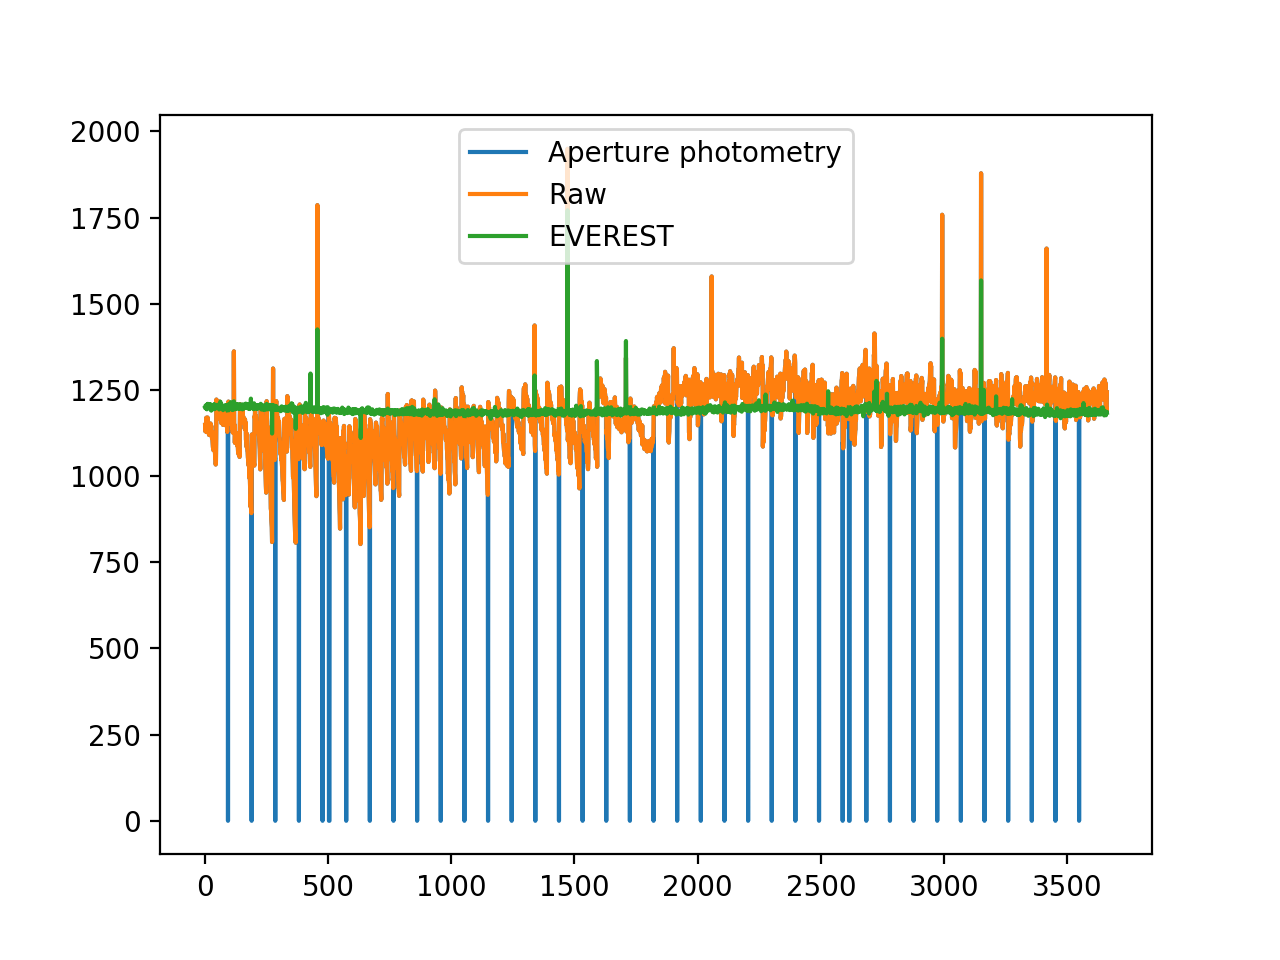

In [24]:
plt.plot(tot_flux, label='Aperture photometry')
plt.plot(star.fraw, label = 'Raw')
plt.plot(star.flux, label='EVEREST')

plt.legend(loc='best');

The difference is probably related to certain cadences that have no data available.

<!--NAVIGATION-->
< [Fetch all the KEGS data with `wget`](01.03-wget-all-KEGS-data.ipynb) | [Contents](Index.ipynb) | [KEGS galaxies reduced with EVEREST](01.05-Match_Everest_meta_data.ipynb) >